Basically the same as iteration 2, just more efficient coding

In [1]:
import pandas as pd
import sys
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\custom_python")
from silvhua import *
# import seaborn as sns
# import matplotlib.pyplot as plt
from silvhua_plot import *
from PIL import Image
from sklearn.linear_model import LinearRegression
import numpy as np
# from sklearn import linear_model
# from sklearn.linear_model import LassoCV
# import re
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\src")
from processing_functions import *
from plot_functions import *
from capstone_modelling import *


In [2]:
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\data'
df_fw = load_csv('data_freeweight_corrected.csv',path, column1_as_index=False)
df_sm = load_csv('data_sm.csv',path, column1_as_index=False)
df_fw.head()

Dataframe shape:  (52, 15)
Dataframe shape:  (52, 15)


,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV
0,22,77.8,175.0,39.0,78,114.0,156.0,175.0,190.0,1.05,0.91,0.76,0.52,0.39,0.26
1,21,71.6,179.0,24.0,48,72.0,96.0,108.0,120.0,1.03,0.91,0.68,0.49,0.39,0.27
2,19,60.8,165.0,26.0,52,78.0,104.0,117.0,130.0,1.06,0.92,0.76,0.51,0.37,0.26
3,21,58.4,172.0,20.0,40,60.0,80.0,90.0,100.0,0.97,0.85,0.68,0.50,0.38,0.26
4,20,82.3,185.0,30.0,60,90.0,120.0,135.0,150.0,1.02,0.92,0.76,0.50,0.40,0.29


# Feature engineering

In [3]:
loads = [20, 40, 60, 80, 90]
unique_load_pairs = create_pairs(loads)
unique_load_pairs.append([40, 60, 80])
unique_load_pairs.append([40, 60, 80, 90])
unique_load_pairs

Number of unique pairs: 10


[[20, 40],
 [20, 60],
 [20, 80],
 [20, 90],
 [40, 60],
 [40, 80],
 [40, 90],
 [60, 80],
 [60, 90],
 [80, 90],
 [40, 60, 80],
 [40, 60, 80, 90]]

In [5]:
model_names = []
for load_pair in unique_load_pairs:
    name = 'LV '+'-'.join([str(item) for item in load_pair])
    model_names.append(name)
model_names

['LV 20-40',
 'LV 20-60',
 'LV 20-80',
 'LV 20-90',
 'LV 40-60',
 'LV 40-80',
 'LV 40-90',
 'LV 60-80',
 'LV 60-90',
 'LV 80-90',
 'LV 40-60-80',
 'LV 40-60-80-90']

In [6]:
# Create dataframes with engineered features: FW
df_fw_dict = dict()
for index, model in enumerate(model_names):
    df_fw_dict[model] = individual_regression2(df_fw, unique_load_pairs[index])

df_fw_dict.keys()

Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)


dict_keys(['LV 20-40', 'LV 20-60', 'LV 20-80', 'LV 20-90', 'LV 40-60', 'LV 40-80', 'LV 40-90', 'LV 60-80', 'LV 60-90', 'LV 80-90', 'LV 40-60-80', 'LV 40-60-80-90'])

In [7]:
# Create dataframes with engineered features: SM
df_sm_dict = dict()
for model in model_names:
    df_sm_dict[model] = individual_regression2(df_sm, load_pair)
df_sm_dict.keys()

Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)


dict_keys(['LV 20-40', 'LV 20-60', 'LV 20-80', 'LV 20-90', 'LV 40-60', 'LV 40-80', 'LV 40-90', 'LV 60-80', 'LV 60-90', 'LV 80-90', 'LV 40-60-80', 'LV 40-60-80-90'])

## Make sure these values match what was calculated in iteration 2

In [36]:
df_fw_dict['LV 40-60'].tail(3)

,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV,slope,intercept,group MVT
49,23.0,74.4,181.0,27.0,54.0,81.0,108.0,121.0,135.0,1.09,0.92,0.71,0.49,0.39,0.28,-128.571429,172.285714,0.275192
50,19.0,83.7,184.4,30.0,60.0,90.0,120.0,135.0,150.0,1.08,0.99,0.73,0.48,0.42,0.26,-115.384615,174.230769,0.275192
51,20.0,80.7,182.0,35.5,71.0,106.0,141.5,159.5,177.0,1.08,0.85,0.69,0.47,0.41,0.26,-218.750000,256.937500,0.275192


In [37]:
df_fw_dict['LV 40-60-80-90'].head(3)

,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV,slope,intercept,group MVT
0,22.0,77.8,175.0,39.0,78.0,114.0,156.0,175.0,190.0,1.05,0.91,0.76,0.52,0.39,0.26,-184.917733,250.021938,0.275192
1,21.0,71.6,179.0,24.0,48.0,72.0,96.0,108.0,120.0,1.03,0.91,0.68,0.49,0.39,0.27,-116.018416,152.641372,0.275192
2,19.0,60.8,165.0,26.0,52.0,78.0,104.0,117.0,130.0,1.06,0.92,0.76,0.51,0.37,0.26,-116.046002,162.019441,0.275192


# Train test split
2022-12-01 18:42: After talking to mentor, decided to avoid train-test split and just use cross-validation due to small sample size

In [3]:
# Function
def sorted_test_split2(df_fw, df_sm, start, step):
    """
    Sort participants by free weight squat 1RM, then perform train-test split so 
    train and test groups have similar free weight 1RM values.

        Parameters:
            - df_fw: Dataframe containing free weight data set.
            - df_sm: DataFrame containing smith machine data set.
        Returns:
            - fw_train, fw_test, sm_train, sm_test : 4 dataframes containing train and test sets.
        
        Syntax:
        fw_train, fw_test, sm_train, sm_test = sorted_test_split(df_fw, df_sm)
    """
    test_sorted_df_implicit_index = [i for i in range(start,len(df_sm),step)]
    print(f'Original df shapes: {df_fw.shape}, {df_sm.shape}')
    fw_test = df_fw.sort_values('Load-1RM-1').iloc[test_sorted_df_implicit_index, :]
    test_exp_index = fw_test.index
    train_index = df_fw.index[~df_fw.index.isin(test_exp_index)]
    fw_train = df_fw.loc[train_index, :]
    
    # ensure train-test split has same participants for smith machine data as in free weight data
    sm_test = df_sm.loc[test_exp_index, :] 
    sm_train = df_sm.loc[train_index, :]
    print(f'Test index: {test_exp_index.to_list()}')
    print(f'Train index: {train_index.to_list()}')
    print(f'Train shapes: {fw_train.shape}, {sm_train.shape}')
    print(f'Test shapes: {fw_test.shape}, {sm_test.shape}')
    print(f'Mean FW squat 1RM in train sample: {fw_train["Load-1RM-1"].mean():.2f}')
    print(f'Mean FW squat 1RM in test sample: {fw_test["Load-1RM-1"].mean():.2f}')
    return fw_train, fw_test, sm_train, sm_test

# test the function
start= 5
step = 7
fw_train, fw_test, sm_train, sm_test = sorted_test_split2(df_fw, df_sm, start, step)

Original df shapes: (52, 15), (52, 15)
Test index: [31, 34, 7, 25, 10, 27, 37]
Train index: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 28, 29, 30, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
Train shapes: (45, 15), (45, 15)
Test shapes: (7, 15), (7, 15)
Mean FW squat 1RM in train sample: 136.27
Mean FW squat 1RM in test sample: 136.36


In [39]:
start= 5
step = 7
df_fw_train_dict = dict()
df_fw_test_dict = dict()
df_sm_train_dict = dict()
df_sm_test_dict = dict()
for model in model_names:
    df_fw_train_dict[model], df_fw_test_dict[model], df_sm_train_dict[model], df_sm_test_dict[model] = sorted_test_split2(
        df_fw_dict[model], df_sm_dict[model], start, step)

Original df shapes: (52, 18), (52, 18)
Test index: [31, 34, 7, 25, 10, 27, 37]
Train index: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 28, 29, 30, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
Train shapes: (45, 18), (45, 18)
Test shapes: (7, 18), (7, 18)
Mean FW squat 1RM in train sample: 136.27
Mean FW squat 1RM in test sample: 136.36
Original df shapes: (52, 18), (52, 18)
Test index: [31, 34, 7, 25, 10, 27, 37]
Train index: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 28, 29, 30, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
Train shapes: (45, 18), (45, 18)
Test shapes: (7, 18), (7, 18)
Mean FW squat 1RM in train sample: 136.27
Mean FW squat 1RM in test sample: 136.36
Original df shapes: (52, 18), (52, 18)
Test index: [31, 34, 7, 25, 10, 27, 37]
Train index: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 

In [43]:
df_fw_test_dict['LV 40-60-80-90'].head(3)

,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV,slope,intercept,group MVT
31,18.0,60.7,173.0,20.0,40.0,60.0,80.0,90.0,100.0,1.04,0.86,0.71,0.52,0.38,0.25,-104.483211,132.018383,0.275192
34,23.0,63.4,174.0,24.0,48.0,72.0,96.0,108.0,120.0,0.94,0.87,0.69,0.48,0.39,0.29,-123.424879,155.980614,0.275192
7,23.0,83.4,182.0,25.5,51.0,76.5,102.0,115.0,127.5,1.11,0.85,0.68,0.49,0.40,0.28,-141.211745,171.558106,0.275192


# Model evaluation functions

In [8]:
from sklearn.model_selection import cross_validate
def evaluate_with_cv(df, x_columns, model, model_name='regressor'):
    """
    Model, fit, and evaluate machine learning model compared with statistical linear regression.

    """

    X = df[x_columns]
    y = df['Load-1RM-1']
    cv_results = cross_validate(model, X, y, cv=10,
        scoring=['r2', 'neg_mean_absolute_error']
        )
    scores = dict()
    scores['mae']= abs(cv_results['test_neg_mean_absolute_error'].mean())
    scores['r^2'] = cv_results['test_r2'].mean()
    
    return scores

In [9]:
def plot_residuals(df, predictions, title='Model'):
    sns.reset_defaults()
    %matplotlib inline
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))
    sns.scatterplot(y=predictions-df['Load-1RM-1'], 
        x=df['Load-1RM-1'], alpha=0.7,
        ax=ax).axhline(y=0, ls=':')
    ax.set_title(f'{title} regression residuals')

    return ax

# # Plot residuals
residuals_plot[model] = plot_residuals(df, predictions, title='Model')


NameError: name 'df' is not defined

In [177]:
residuals_plot[model]

NameError: name 'residuals_plot' is not defined

# Statistical testing functions

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.ttest_ind.html


In [19]:
import scipy.stats as st

def compare_means(d1, d2, type='paired'):
    """
    Perform 2-sample t-tests and calculate Cohen's d effect size between two samples.
    """
    stats = pd.Series(dtype='float64')
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    if type=='paired': 
        # Calculate standard deviation of first sample
        s = np.sqrt(s1)
        # Calculate t-test
        stats['t statistic'], stats['ttest pvalue'] = st.ttest_rel(d1, d2)
    else:
        # calculate the pooled standard deviation
        s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
        # Calculate t-test
        stats['t statistic'], stats['ttest pvalue'] = st.ttest_ind(d1, d2)
    # calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)
    # calculate the effect size
    stats['Cohens d'] = round(((u2 - u1) / s), 2)
    return stats
     

# Modelling
* Free weight models are the same as in iteration 2 (originally I was going to use train-test split, but then changed my plan after talking with a mentor)

In [17]:
# 2022-12-02 21:11 Modify so it can run RandomForest
from sklearn.ensemble import RandomForestRegressor

def batch_model(model_names, df_dict, estimator=None, x_columns=['slope', 'intercept'], pickle_name=None,
    path=r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output'):
    """2022-12-02 23:06
    Fit and evaluate multiple dataframes using given estimator. Meant for testing multiple 
        feature engineering iterations.
    Parameters:
        - model_names (list): List of model names to iterate over.
        - df_dict (dict): Dictionary of DataFrames containing the data for modelling.
        - x_columns (list): List of feature names in the dataframes.
        - pickle_name (str): Root of filename for saving results. If None, results are not automatically saved.

    Returns:
        - predictions (DataFrame): Predictions from each of the models.
        - metrics (DataFrame): Cross validation metrics, model coefficients, 
            paired ttest results and Cohen's d effect size between predicted vs. true results.
        - model_dict (dict): Dictionary containing the trained models. 

    Example syntax:
        predictions, metrics, model_dict = batch_model(model_names, df_fw_dict, pickle_name='03 iteration')
    """
    # Initialize dataframes for storing model outputs
    predictions = pd.DataFrame()
    coefficients = pd.DataFrame()
    cv_metrics = pd.DataFrame()
    stats = pd.DataFrame()
    model_dict = dict()
    
    # Add true y value
    predictions['Measured'] = df_dict[model_names[0]]['Load-1RM-1']

    for model in model_names:
        # Run model
        if (estimator==None):
            model_dict[model] = LinearRegression() 
            predictions[model], fig, coefficients[model] = model_data_vs_stat(
                df_dict[model], x_columns, model=model_dict[model], model_name=model
            )
        else: 
            model_dict[model] = estimator
            model_dict[model].fit(df_dict[model][x_columns], df_dict[model]['Load-1RM-1'])
            predictions[model] = model_dict[model].predict(df_dict[model][x_columns])
        # cross-validation metrics
        cv_metrics[model] = evaluate_with_cv(df_dict[model], x_columns, 
            model=model_dict[model], model_name=model)

        # ttest and Cohen's d effect size
        stats[model] = compare_means(
                df_dict[model]['Load-1RM-1'], # True y value
                predictions[model], type='paired') # Model predicts

        # Concatenate
        metrics = pd.concat([cv_metrics, 
            stats, 
            coefficients
            ], axis=0)
        metrics = round(metrics, 4)
        # pickle the model
        if pickle_name:
            savepickle(model_dict[model], f'{pickle_name} {model}', path=path+'\models')
        
    # save predictions and metrics
    if pickle_name:
        save_csv(predictions, f'{pickle_name} predictions', path=path+'\predictions')
        save_csv(metrics, f'{pickle_name} metrics and coefficients', path=path+'\models')

    return predictions, metrics, model_dict



LV 20-40 evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			13.55		55.76		-42.21
MAE: 			9.97		40.13		-30.15
mean error: 		0.00		34.81		-34.81
R^2: 			0.74		-3.33		4.07
Pearson r statistic: 	0.86		0.70		0.16
			p=0.00		p=0.00

predictions mean: 	136.28		171.09		-34.81
predictions std: 	23.13		58.45		-35.32

target mean: 136.28
target std: 27.07

Model feature coefficients
	LV slope: 1.4572574180753088
	LV intercept: 1.6057812090308095
	model intercept:  47.67430442274886

LV 20-60 evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			9.19		22.65		-13.46
MAE: 			6.82		16.96		-10.14
mean error: 		0.00		15.73		-15.73
R^2: 			0.88		0.29		0.60
Pearson r statistic: 	0.94		0.90		0.04
			p=0.00		p=0.00

predictions mean: 	136.28		152.01		-15.73
predictions std: 	25.18		35.59		-10.41

target mean: 136.28
target std: 27.07

Model feature coefficients
	LV slope: 1.1425061876977423
	LV intercept: 1.5131076856096857
	model intercept:  21.08493842477739

LV 20-80 

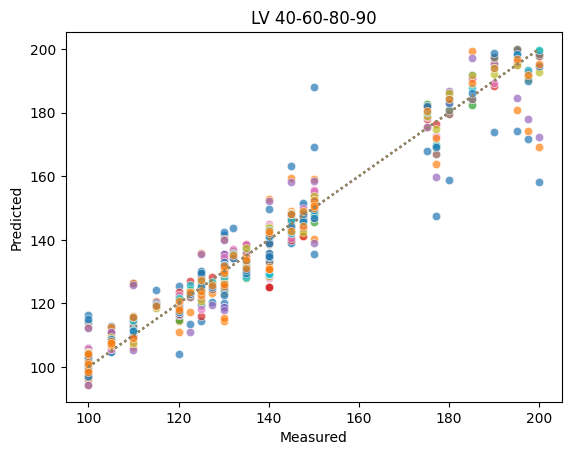

In [114]:
# linear regression on free weight data
predictions, metrics, model_dict = batch_model(model_names, df_fw_dict, pickle_name='03 iteration')

In [7]:
metrics = load_csv('03 iteration metrics and coefficients.csv', filepath=r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\models', 
    column1_as_index=True)
metrics.head()

Dataframe shape:  (8, 12)


,LV 20-40,LV 20-60,LV 20-80,LV 20-90,LV 40-60,LV 40-80,LV 40-90,LV 60-80,LV 60-90,LV 80-90,LV 40-60-80,LV 40-60-80-90
mae,10.8950,7.4328,3.347,3.6524,7.0404,3.0367,3.5909,3.1772,3.4033,3.0681,3.4463,3.0105
r^2,0.5862,0.8249,0.969,0.9413,0.8463,0.9733,0.9538,0.9726,0.9567,0.9647,0.9700,0.9703
t statistic,-0.0000,-0.0000,-0.000,-0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000
ttest pvalue,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Cohens d,0.0000,0.0000,0.000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000


# Random Forest

In [20]:
predictions_rf, metrics_rf, model_dict_rf = batch_model(model_names, 
    df_fw_dict, estimator=RandomForestRegressor(random_state=0), pickle_name=None)

In [171]:
save_csv(metrics_rf, 'RandomForest_FW_metrics_and_coefficients', r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\models\randomforestregressor')
save_csv(predictions_rf, 'RandomForest_FW_predictions', r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\predictions\randomforestregressor')
savepickle(model_dict_rf, 'RandomForest_models_dictionary', path=r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\models\randomforestregressor')

File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/models/randomforestregressor/RandomForest_FW_metrics_and_coefficients.csv
File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/predictions/randomforestregressor/RandomForest_FW_predictions.csv
File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/models/randomforestregressor/RandomForest_models_dictionary.sav


## Explore model attributes

In [32]:
model_dict_rf['LV 20-90'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [35]:
model_dict_rf['LV 20-90'].decision_path(df_fw_dict['LV 20-90'][['slope', 'intercept']])

(<52x4522 sparse matrix of type '<class 'numpy.int64'>'
 	with 32331 stored elements in Compressed Sparse Row format>,
 array([   0,   49,  102,  155,  200,  251,  294,  337,  386,  435,  470,
         509,  558,  607,  656,  703,  752,  797,  840,  881,  918,  967,
        1014, 1065, 1112, 1159, 1196, 1239, 1280, 1321, 1360, 1411, 1452,
        1497, 1540, 1587, 1632, 1677, 1726, 1763, 1802, 1849, 1898, 1941,
        1986, 2027, 2070, 2121, 2170, 2213, 2256, 2297, 2342, 2377, 2428,
        2471, 2512, 2567, 2606, 2653, 2692, 2741, 2786, 2837, 2880, 2923,
        2966, 3021, 3060, 3113, 3168, 3217, 3260, 3307, 3356, 3389, 3442,
        3479, 3524, 3561, 3610, 3663, 3704, 3745, 3788, 3837, 3886, 3929,
        3966, 4009, 4054, 4105, 4152, 4201, 4242, 4289, 4336, 4387, 4430,
        4471, 4522]))

In [40]:
# import os     
# os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'
import pygraphviz
import graphviz
from sklearn.tree import export_graphviz 

ModuleNotFoundError: No module named 'graphviz'

## Plot model results

Metrics dataframe shape (free weight data): (624, 3)


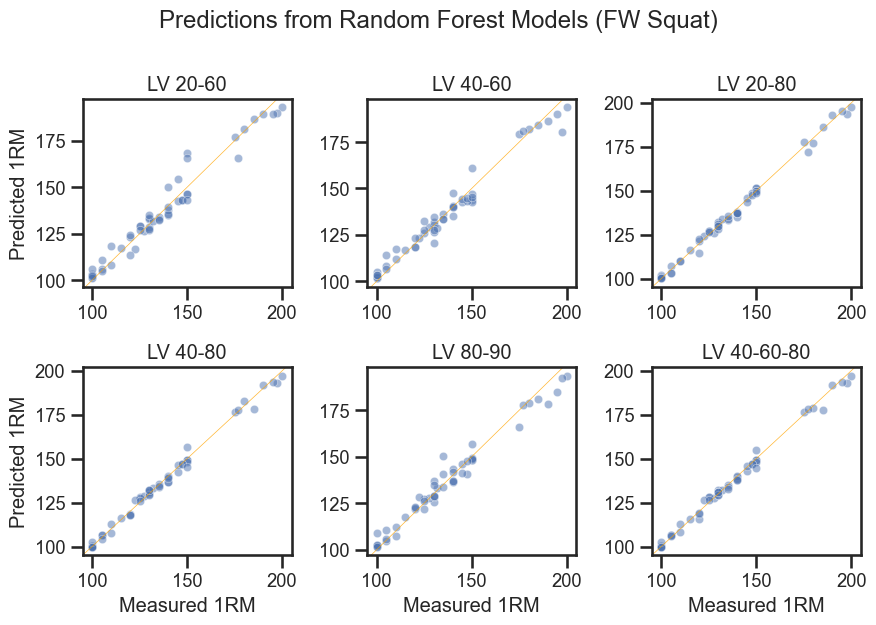

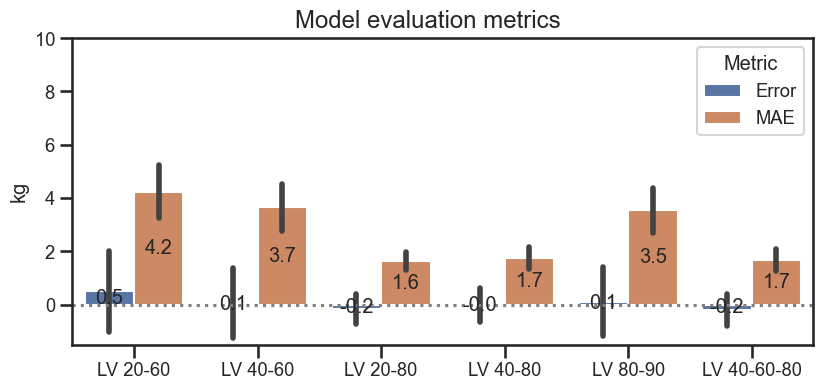

In [134]:
def compare_models2(predictions, title='Measured 1RM vs. model predictions', 
    context='talk', annotate=True, ymin=-1.5, ymax=10):
    """

    Plot predictions from all the models for each of the free weight and smith machine data sets.
        Parameters:
            - predictions (DataFrame): 
                Dataframe that contains target data ('Measured' column) and model predictions
                (1 column per model).
            - title (str): Overall plot title.
            - context (None or str): Seaborn .set_theme() parameter. 
                One of {paper, notebook, talk (default), poster}. If None, set to 'default (notebook)'.
            - annotate (bool): Whether or not to annotate the bar graph with values. Default is True.
        Returns:
            - figure with scatter plots of measured vs. predicted values for all models.
            - figure with bar charts of mean absolute error and mean error for all models.
            - DataFrame containing:
                mean absolute error and mean error for all models.

    Command syntax:
        scatterplot, error_plot, metrics = compare_models2(predictions, 
        title='Model predictions', context='talk')

        scatterplot.savefig('../output/figures/Measured vs predicted.png')
        error_plot.savefig('../output/figures/Error bar chart.png')
        path = r'../output/predictions'
        save_csv(metrics, 'Model errors', path=path)
    """
    fw_models = predictions[predictions.columns[~predictions.columns.str.contains('Measured')]].columns.to_list()
    sns.reset_defaults()    
    %matplotlib inline
    font_scale=.8 if context=='talk' else 1
    rc={'lines.markersize': 6} if context=='talk' else None
    sns.set_theme(context=context, style='ticks', font_scale=font_scale, 
        rc=rc)
    if (len(fw_models) == 6) | (len(fw_models) == 3):
        ncols=3
        nrows = round((len(fw_models)+1)//3)
    else:
        nrows = round((len(fw_models)+1)/4)
        ncols=4
    if nrows > 1:
        fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*3.2))
    else:
        fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*3.7))
    ax = ax.flatten()
    fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(1.4*len(fw_models), 4))
    fw_error = pd.DataFrame()
    for index, model in enumerate(fw_models):
        # Calculate error
        fw_error[model] = predictions[model] - predictions['Measured'] 

        # Plot measured vs. predicted values for each model
        ax[index].axline(xy1=(150, 150), slope=1, alpha=0.8, linewidth=0.5, color='orange')
        if index == 0:
            ax[index].set_ylabel('Predicted') 
        sns.scatterplot(data=predictions, x='Measured', y=model, ax=ax[index],
            alpha=0.5, marker='o', legend=False, 
        ).set(xlabel=None, ylabel=None)
        ax[index].set_title(model)
        if index % ncols == 0:
            ax[index].set_ylabel('Predicted 1RM') 
        if index >= len(fw_models) -ncols:
            ax[index].set_xlabel('Measured 1RM') 
    fig.suptitle(title)
    fig.tight_layout(rect=[0, 0, 1, 0.98])
    fig2.tight_layout(rect=[0, 0, 1, 0.98])

    # Calculate remaining evaluation metrics and reshape dataframe for plotting
    fw_error['Metric'] = 'Error'
    fw_mae = abs(fw_error.iloc[:,:-1])
    fw_mae['Metric'] = 'MAE'
    fw_metrics = pd.concat([fw_error, fw_mae], axis=0).melt(
        value_vars=fw_models, id_vars=['Metric'], var_name='model')
    print(f'Metrics dataframe shape (free weight data): {fw_metrics.shape}')

    # Plot evaluation metrics: 
    sns.barplot(data=fw_metrics, y='value', x='model', hue='Metric', 
        errorbar=('se', 1.96), # error bars set to 95% confidence interval, or 1.96*standard error
        ax=ax2).set_ylim([ymin, ymax])
    ax2.axhline(y=0, ls=':', color='grey')
    ax2.set(ylabel='kg', xlabel=None)
    
    # Label bars with value
    if annotate:
        for i in ax2.containers:
                ax2.bar_label(i, fmt='%.1f', label_type='center') 
    # Titles and axis labels
    fig2.suptitle('Model evaluation metrics')
    return fig, fig2, fw_metrics

selected_models = ['LV 20-60', 'LV 40-60', 'LV 20-80', 'LV 40-80','LV 80-90', 'LV 40-60-80', 'Measured']
scatterplot, error_plot, metrics = compare_models2(predictions_rf[selected_models],
    title='Predictions from Random Forest Models (FW Squat)', context='talk')

In [21]:

def cv_mae_r2(df, estimator, x_columns, cv_folds=10):
    """2022-12-02 from 23:09 2022-12-01 iteration 3 notebook.

    Determine mean absolute error through cross-validation.

    Parameters:
        - df: DataFrame containing the data.
        - estimator: Instantiate a regressor, e.g. LinearRegression(). 
        - x_columns: Feature columns in df.
        - cv_folds: Number of cross validation folds.

    Returns:
        mae, r2 (array): Results from all cross validation folds.
    """
    X = df[x_columns]
    y = df['Load-1RM-1']
    cv_results = cross_validate(estimator, X, y, cv=cv_folds,
        scoring=['neg_mean_absolute_error', 'r2']
        )
    mae = abs(cv_results['test_neg_mean_absolute_error'])
    r2 = cv_results['test_r2']
    return mae, r2

def run_cv(df, model, x_columns=['slope', 'intercept'], cv_folds=10):
    """2022-12-02 23:50 seems redundant
    
    Determine mean absolute error through cross-validation on multiple models.

    Parameters:
        - df: DataFrame containing the data.
        - model: Estimator object. 
        - x_columns: Feature columns in df.
        - cv_folds: Number of cross validation folds.

    Returns:
        mae, r2: DataFrames of shape (cv_folds, 1) containing the MAE and r^2 scores from each fold.
    """
    mae = pd.DataFrame()
    r2 = pd.DataFrame()
    mae[model], r2[model] = cv_mae_r2(df, x_columns, model, cv_folds)
    
    return mae, r2

def batch_run_cv(model_names, df_dict, estimator, x_columns=['slope', 'intercept'], cv_folds=10):
    """2022-12-02 from 23:09 2022-12-01 iteration 3 notebook.
    
    Determine mean absolute error through cross-validation on multiple models.

    Parameters:
        - model_names (list): List of model names to iterate over.
        - df_dict (dict): Dictionary of DataFrames containing the data for modelling.
        - x_columns (list): List of feature names in the dataframes.
        - estimator: Instantiate a regressor, e.g. LinearRegression(). 
        - x_columns: Feature columns in df.
        - cv_folds: Number of cross validation folds.

    Returns:
        mae, r2: DataFrames containing the MAE and r^2 scores from each fold (1 column per model).
    """
    
    cv_mae = pd.DataFrame()
    cv_r2 = pd.DataFrame()
    for model in model_names:
        cv_mae[model], cv_r2[model] = cv_mae_r2(df_dict[model], estimator, x_columns, cv_folds)
    return cv_mae, cv_r2

cv_mae_rf = pd.DataFrame()
cv_r2_rf = pd.DataFrame()
cv_mae_rf, cv_r2_rf = batch_run_cv(model_names, df_fw_dict, RandomForestRegressor(random_state=0))
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\model metrics\random forest cv metrics'
save_csv(cv_mae_rf, 'cv_mae_randomforest_fw', path)
save_csv(cv_r2_rf, 'cv_r2_randomforest_fw', path)

File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/model metrics/random forest cv metrics/cv_mae_randomforest_fw.csv.csv
File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/model metrics/random forest cv metrics/cv_r2_randomforest_fw.csv.csv


In [25]:
def plot_cv_metrics(mae_df, r2_df, color='silver', context='talk', ymin=None, ymax=1.1):
    """
    Create barplots cross-validated MAE and r^2 for multiple models.

    Parameters:
        - mae_df, r2_df: DataFrames containing MAE and r^2, respectively,
            for all folds and all models (1 column per model).
    Returns:
        - Figure.
    """
    sns.reset_defaults()    
    sns.set_theme(context=context, style='ticks')
    %matplotlib inline
    fig, ax = plt.subplots(nrows=2, ncols=1, 
        figsize=(mae_df.shape[1]*(1.5 if context=='talk' else 1), 4))
    sns.barplot(data=mae_df, color=color, 
        ax=ax[0], errorbar=('se', 1.96)).set_title('Cross-Validated Mean Absolute Error')
    ax[0].set_ylabel('kg')
    for i in ax[0].containers:
        ax[0].bar_label(i, fmt='%.1f', label_type='center') 
    sns.barplot(data=r2_df, color=color, 
        ax=ax[1], errorbar=('se', 1.96)).set_title('Cross-Validated R^2 Score')
    ax[1].set_ylim([ymin, ymax])
    for i in ax[1].containers:
        ax[1].bar_label(i, fmt='%.3f', label_type='edge',padding=-25) 
    fig.tight_layout(rect=[0, 0, 1, 0.98])
    # Titles and axis labels
    # fig.suptitle('Cross-Validated Evaluation Metrics')
    return fig

C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


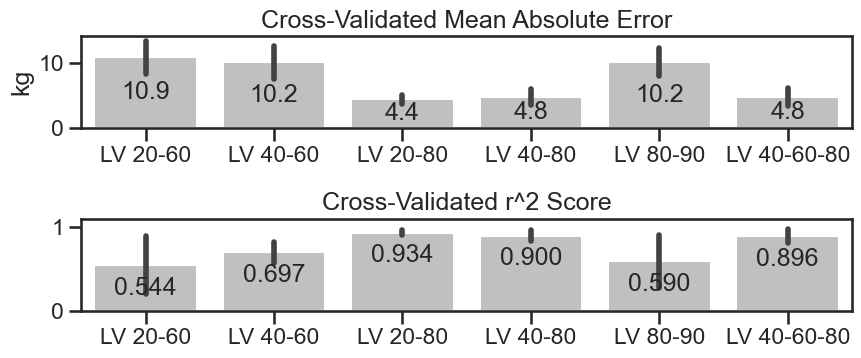

In [23]:
selected_models = ['LV 20-60', 'LV 40-60', 'LV 20-80', 'LV 40-80','LV 80-90', 'LV 40-60-80']

plot_cv_metrics(cv_mae_rf[selected_models], cv_r2_rf[selected_models]).savefig(
    '../output/figures/randomforest/randomforest CV metrics SELECT MODELS.png')

C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


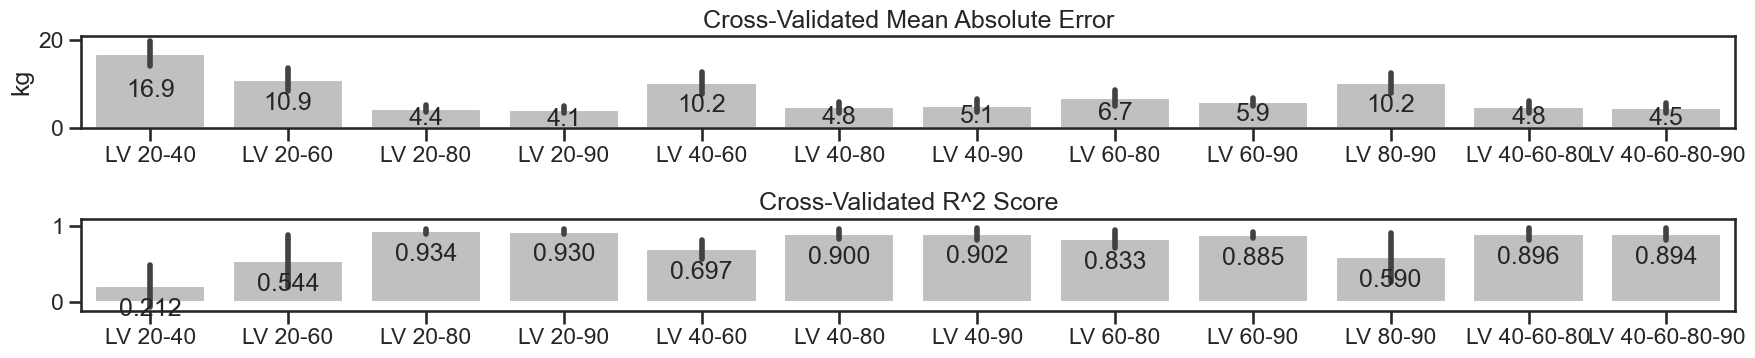

In [26]:
plot_cv_metrics(cv_mae_rf, cv_r2_rf).savefig(
    '../output/figures/randomforest/randomforest CV metrics ALL MODELS.png')
# Unlike with Linear Regression models, the provide
# best predictions are when the LV slope is determined using a larger range between the lowest
# and highest loads

In [10]:
cv_r2_rf

NameError: name 'cv_r2_rf' is not defined

# *End of Page*